In [1]:
#Imnporting libraries
import pandas as pd
import numpy as np
from scipy.optimize import fmin_slsqp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import math
import scipy
import scipy.stats as stats
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import linear_model
import Tkinter as tk
import statsmodels.api as sm
from pyvttbl import DataFrame
from scipy.stats import spearmanr
from statsmodels.tsa.seasonal import seasonal_decompose

#Listing the existing files in the dir
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

code.ipynb
time_series.ipynb
time_series_complete.ipynb
COMMIT_EDITMSG
config
description
HEAD
index
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update.sample
exclude
HEAD
master
master
349a6c56502d4f9fdb04d78d8aeb27fbad0729
f1b70eed8c0f58883c67ae94393f5912538e83
87365763a6699abeb78e36b29599108e065542
25b05f0e7663043a1dbcf0fbed96ec01287b59
3b2a981d9ef04a707fc79e1f4d19814f50a52a
7665ed2976863334253b076b8b870355dfd30e
8238ea02b1095a2e9f6f7466d17e37a4009604
2bdc80716c38b985d1fff6ff89ee828fffe856
008e38e53173d537c97cd7f0f4c9095cc2c920
5a164683dab14a2c38acea119d67b93896b80a
f61801577291fe904e21dc0010267661f72f3d
42a29f266ab659e685cef3802de3af0e1b61c7
7e923d3d70cf19a2befa8dc8e07e5250be5edb
691f6c8009de7e94a6f15970341f7db3d50f5d
90eeb31c5e8b9757d1c386fba0290f5550a017
8a1b4139c3977dfd8d9b5554209bbd4b960b64
22a8e0b2c4fc2e1bb3f7f438852e93

In [110]:
#Loading the data
df = pd.read_csv('./files/energydata_complete.csv')
df.head()
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [111]:
#Converting the time series to a datetime format
df.set_index(pd.to_datetime(df['date']), inplace=True)#alternativly use pd.read_csv(...parse_dates = ['date'], index_col='date')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


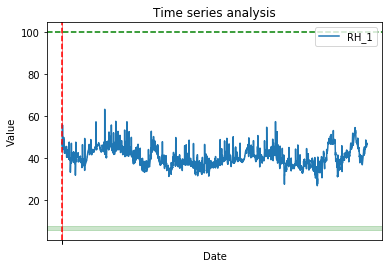

In [76]:
#Ploting the results
#fig, axs = plt.subplots(2, 1, figsize=(5, 10))
#data.iloc[:1000].plot(x='time', y='values', ax=axs[0])
#data2.iloc[:1000].plot(x='time', y='values', ax=axs[1])
#plt.show()
ax = df.plot(x='date', y='RH_1')
ax.set_title('Time series analysis')
ax.set_xlabel('Date', fontsize = 10)
ax.set_ylabel('Value')

#To draw the line, use axvline and axhline
ax.axvline(x='1969-01-01', color = 'red', linestyle = '--')
ax.axhline(y=100, color='green', linestyle='--')
#To shade the region, use axvspan and axhspan
ax.axvspan('1964-01-01','1968-01-01', color = 'red', alpha=0.5)
ax.axhspan(8,6,color='green',alpha=0.2)
           
plt.show()

In [45]:
#Exploratory data analysis
df.isnull().sum()

#Filling up the missing values
df = df.fillna(method = 'bfill') #alternativly, use ffill or fill_value=0.For example, specifying bfill (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while ffill (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [77]:
#To show all years, use
df.index.year #or df.index.month to show the months that are in the dataset

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name=u'date', length=19735)

In [81]:
#To aggregate the values, use
df_index_month = df.index.month
df_by_month = df.groupby(df_index_month).mean() #alternativly, use df_resample = df.resample(rule = 'M').mean()
df_by_month.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
1,97.026010,4.722793,19.945175,42.284480,19.102295,41.656070,19.876480,42.680624,18.486529,42.713621,...,16.693852,44.437044,4.128936,758.947467,86.607461,4.795517,39.790554,1.986071,24.664758,24.664758
2,100.945881,6.343391,21.163817,41.010174,19.924704,40.538365,21.417500,40.813789,19.894403,40.366176,...,18.300514,43.012997,4.817301,753.387033,84.230125,4.847821,38.762332,2.193894,25.465301,25.465301
3,96.953405,3.915771,21.259760,37.923927,19.141096,39.688162,21.534074,37.242069,20.277842,36.322600,...,19.102725,39.310958,5.439415,755.840916,80.734991,3.992832,40.116599,2.135540,24.823175,24.823175
4,98.888889,2.416667,21.856511,39.722240,20.224405,40.686375,23.018526,37.767839,21.381889,37.613754,...,20.292047,39.910451,8.513449,754.606319,77.209954,3.652431,36.322338,4.387639,25.057480,25.057480
5,94.199325,1.770049,23.877728,41.219759,23.253625,39.905697,25.010280,38.903170,23.771948,39.497038,...,22.427778,42.219581,13.762717,755.898430,71.402673,3.079419,36.939138,7.984661,24.829057,24.829057


Text(0,0.5,'Value')

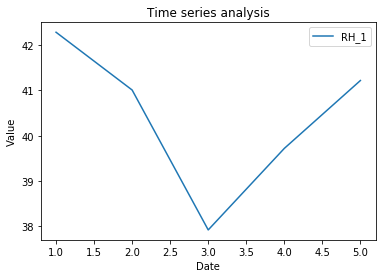

In [80]:
ax = df_by_month.plot(y='RH_1')
ax.set_title('Time series analysis')
ax.set_xlabel('Date', fontsize = 10)
ax.set_ylabel('Value')

In [103]:
#To convert to a monthly data
df.asfreq('M') #be careful with using asfreq. e.g. resample seems to be more correct

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-31 17:00:00,2016-01-31 17:00:00,150,0,22.100000,43.730000,21.533333,42.590000,21.533333,44.863333,19.500000,...,16.790000,47.290000,9.1,751.3,97.0,7.0,21.0,8.6,28.185397,28.185397
2016-02-29 17:00:00,2016-02-29 17:00:00,50,0,21.790000,33.333333,19.790000,32.900000,23.500000,35.133333,19.730000,...,18.533333,38.090000,5.9,762.5,50.0,5.0,40.0,-3.9,11.684222,11.684222
2016-03-31 17:00:00,2016-03-31 17:00:00,80,0,21.290000,39.700000,19.600000,40.790000,21.963333,37.500000,20.633333,...,20.066667,38.833333,8.3,753.7,79.0,6.0,28.0,4.8,19.907957,19.907957
2016-04-30 17:00:00,2016-04-30 17:00:00,370,0,22.033333,43.360000,20.890000,42.126667,23.600000,35.826667,20.200000,...,19.463333,37.863333,10.5,760.0,64.0,6.0,40.0,4.0,27.126134,27.126134


In [98]:
#To pase the dates, use
df['2016-01-01': '2016-02-01']

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,NaN,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,NaN,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,NaN,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,NaN,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,NaN,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
2016-01-11 17:50:00,NaN,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
2016-01-11 18:00:00,NaN,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
2016-01-11 18:10:00,NaN,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
2016-01-11 18:20:00,NaN,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702


In [112]:
#To shift data
df['shifted'] = df.RH_1.shift() #to move one period forwards
df['shifted2'] = df.RH_1.shift(periods = -1) #to move one period backwards
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,shifted,shifted2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,NaN,46.693333
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,47.596667,46.300000
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,46.693333,46.066667
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,46.300000,46.333333
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,46.066667,46.026667


In [119]:
#To calculate pct change
df['change'] = df.RH_1.divide(df.shifted)
df['change2'] = df.change.sub(1).multiply(100)
df['change3'] = df.RH_1.pct_change().multiply(100) #alternativly to above, use. To calculate pct change several periods appart, put pct_change(5), etc.
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,shifted,shifted2,change,change2,change3
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,7.000000,63.000000,5.3,13.275433,13.275433,NaN,46.693333,NaN,NaN,NaN
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.2,18.606195,18.606195,47.596667,46.300000,0.981021,-1.897892,-1.897892
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.333333,55.333333,5.1,28.642668,28.642668,46.693333,46.066667,0.991576,-0.842376,-0.842376
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.000000,51.500000,5.0,45.410389,45.410389,46.300000,46.333333,0.994960,-0.503960,-0.503960
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.9,10.084097,10.084097,46.066667,46.026667,1.005789,0.578871,0.578871


In [121]:
#To calculate difference, use
df['dif'] = df.RH_1.diff(30) #to forexample, calculate the difference between 1st and 30th day

In [ ]:
#df = df.resample('MS').fill().add_suffix('_ffill')
#Plot on the secondary axis interpolated.plot(secondary_y='Unemployment')

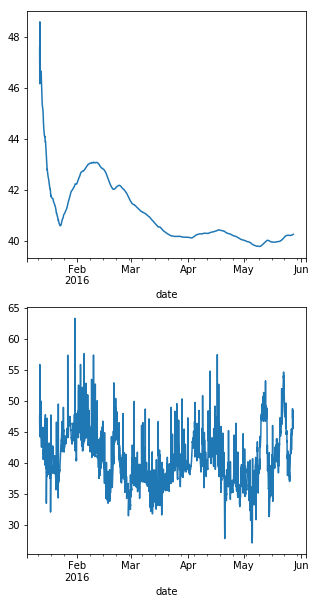

In [127]:
#Ploting the results
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
df['360D'] = df.RH_1.rolling(window='360D').mean()
df['360D'].plot(ax=axs[0])
df['RH_1'].plot(ax=axs[1])
plt.show()